In [16]:
#Import labraries and import dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import pickle

In [17]:
# Data from FX Historical Deck
df = pd.read_csv('USTECH100.csv')
df.tail()

,Time,Open,High,Low,Close,Volume
2553,2023-04-05 0:00,13117.739,13124.289,12892.529,12942.189,1335
2554,2023-04-06 0:00,12942.339,13077.799,12842.819,13046.119,1335
2555,2023-04-07 0:00,13045.609,13076.399,13012.629,13070.077,796
2556,2023-04-10 0:00,13042.817,13062.889,12854.879,13060.599,1335
2557,2023-04-11 0:00,13060.399,13096.899,13033.059,13068.089,660


In [18]:
df.describe()

,Open,High,Low,Close,Volume
count,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000
mean,7695.421900,7765.137146,7621.795781,7699.810186,1134.863174
std,3789.860285,3834.037616,3739.859633,3790.629082,252.252061
min,2857.136000,2875.031000,2824.026000,2857.231000,1.000000
25%,4439.703500,4464.134250,4418.527000,4442.864250,841.000000
50%,6756.869500,6826.069500,6664.614000,6758.369500,1275.000000
75%,11220.988500,11379.196750,11057.690000,11221.461500,1335.000000
max,16589.449000,16768.799000,16495.109000,16576.819000,1378.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2558 entries, 0 to 2557
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    2558 non-null   object 
 1   Open    2558 non-null   float64
 2   High    2558 non-null   float64
 3   Low     2558 non-null   float64
 4   Close   2558 non-null   float64
 5   Volume  2558 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 120.0+ KB


In [20]:
df.isnull().sum()

Time      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [21]:
daframe = df.drop(columns=['Time'], axis=1)
daframe.tail()

,Open,High,Low,Close,Volume
2553,13117.739,13124.289,12892.529,12942.189,1335
2554,12942.339,13077.799,12842.819,13046.119,1335
2555,13045.609,13076.399,13012.629,13070.077,796
2556,13042.817,13062.889,12854.879,13060.599,1335
2557,13060.399,13096.899,13033.059,13068.089,660


In [22]:
def convert_column_to_float(daframe, Volume):
    # Convert the data type to float
    daframe['Volume'] = daframe['Volume'].astype(float)

In [23]:
# Convert the "Volume" column to a float data type
convert_column_to_float(daframe, 'Volume')
daframe.tail()

,Open,High,Low,Close,Volume
2553,13117.739,13124.289,12892.529,12942.189,1335.0
2554,12942.339,13077.799,12842.819,13046.119,1335.0
2555,13045.609,13076.399,13012.629,13070.077,796.0
2556,13042.817,13062.889,12854.879,13060.599,1335.0
2557,13060.399,13096.899,13033.059,13068.089,660.0


In [24]:
daframe['Volume'] = daframe['Volume'] * 1000
daframe.tail()

,Open,High,Low,Close,Volume
2553,13117.739,13124.289,12892.529,12942.189,1335000.0
2554,12942.339,13077.799,12842.819,13046.119,1335000.0
2555,13045.609,13076.399,13012.629,13070.077,796000.0
2556,13042.817,13062.889,12854.879,13060.599,1335000.0
2557,13060.399,13096.899,13033.059,13068.089,660000.0


In [25]:
daframe.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [26]:
Y = daframe[['Close']]
X = daframe[['Open', 'Volume', 'Low', 'High']]

In [27]:
#Splitting the data into tain and test data
X_train, X_test,Y_train,Y_test= train_test_split(X,Y, test_size=0.2, random_state=2)

In [28]:
# Define the model
daframe.shape

(2558, 5)

In [29]:
# Build the model with LSTM Major L but recommended
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.LSTM(units=50, input_shape=(None, X_train.shape[1])))
# model.add(tf.keras.layers.Dense(1))

In [30]:
model = LinearRegression()

In [31]:
# Train the model
model.fit(X_train, Y_train)

LinearRegression()

In [32]:
x_train_pred = model.predict(X_train)
print('The accuracy for my training model is :', x_train_pred)

The accuracy for my training model is : [[ 6297.41897229]
 [ 4945.6560022 ]
 [ 7222.00331004]
 ...
 [11603.46035293]
 [ 7518.80645627]
 [12450.92013738]]


In [33]:
x_test_pred = model.predict(X_test)
print('The accuracy for my testing model is :', x_test_pred)

The accuracy for my testing model is : [[ 4073.78796272]
 [ 4173.18744229]
 [ 3574.47541481]
 [ 3482.54128882]
 [11422.85122071]
 [14201.4803458 ]
 [11774.01233129]
 [ 6931.01114615]
 [ 3488.25388322]
 [ 4326.6742035 ]
 [ 9965.9864954 ]
 [ 8021.74433895]
 [ 4107.18124453]
 [ 3083.59748059]
 [ 4812.99759207]
 [12885.50903907]
 [ 6768.16485578]
 [10681.54152521]
 [10775.08554537]
 [16066.67747275]
 [ 6905.33503074]
 [ 7306.39683723]
 [ 3234.76831598]
 [14001.94948006]
 [11728.1347604 ]
 [ 6538.80566868]
 [ 2983.16601689]
 [13053.0700543 ]
 [14988.03690225]
 [ 9142.07458145]
 [ 5192.66160421]
 [14926.02929443]
 [ 5435.72563022]
 [15374.31060665]
 [16429.07823314]
 [13578.02450571]
 [ 7162.27613591]
 [ 3183.13230513]
 [ 3116.94008668]
 [11484.79039119]
 [ 7203.05456698]
 [ 4416.48757656]
 [ 9704.78406781]
 [ 4330.85160027]
 [ 3828.17255795]
 [13527.18943114]
 [ 6088.5184387 ]
 [ 6448.96872729]
 [ 3636.64731549]
 [13466.83319187]
 [ 8541.4805543 ]
 [ 9217.18292414]
 [ 8765.17883308]
 [14851

In [34]:
# XGBoost 
# Training Data
# R-squared Error
r2s = metrics.r2_score(Y_train, x_train_pred)
print('R-squared Error: ', r2s)

#Mean absolute error
meanerror = metrics.mean_absolute_error(Y_train, x_train_pred)
print('Mean Absolute Error: ', meanerror)

#IDk really
error2 = np.sqrt(metrics.mean_absolute_error(Y_train, x_train_pred))
print('Error: ', error2)

R-squared Error:  0.9998001563743106
Mean Absolute Error:  30.91454355711946
Error:  5.560084851611481


In [35]:
# Test Data
# R-squared Error
r2s2 = metrics.r2_score(Y_test, x_test_pred)
print('R-squared Error: ', r2s2)

#Mean absolute error
meanerror2 = metrics.mean_absolute_error(Y_test, x_test_pred)
print('Mean Absolute Error: ', meanerror2)

#IDk really
error = np.sqrt(metrics.mean_absolute_error(Y_test, x_test_pred))
print('Error: ', error)

R-squared Error:  0.999802533175844
Mean Absolute Error:  32.79517212543155
Error:  5.726706918066573


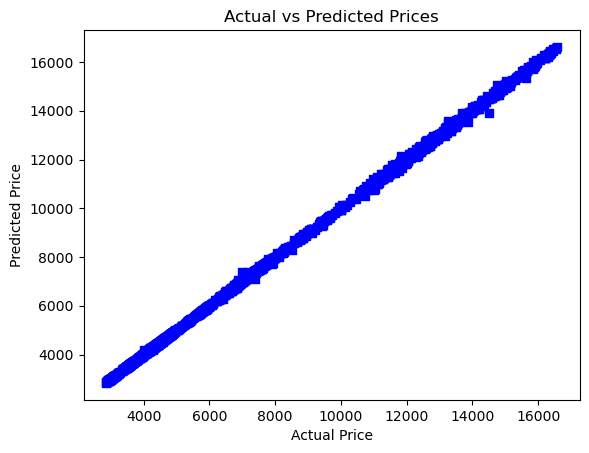

In [36]:
plt.scatter(Y_train, x_train_pred, c = "blue", marker = "s")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()

In [37]:
X.tail()

,Open,Volume,Low,High
2553,13117.739,1335000.0,12892.529,13124.289
2554,12942.339,1335000.0,12842.819,13077.799
2555,13045.609,796000.0,13012.629,13076.399
2556,13042.817,1335000.0,12854.879,13062.889
2557,13060.399,660000.0,13033.059,13096.899


In [38]:
Y.tail()

,Close
2553,12942.189
2554,13046.119
2555,13070.077
2556,13060.599
2557,13068.089


In [39]:
input_data = (12849.6, 48850, 12820.8, 12903.5)
input_values = np.asarray(input_data)

#Reshaping the arrary to get a single result
input_data_reshaped = input_values.reshape(1, -1)

In [40]:
anticipated = model.predict(input_data_reshaped)
if input_data[0] < anticipated:
    print(f"Buy!! & TP:{anticipated.round(2)}")
else:
    print(f"Sell!! & TP:{anticipated.round(2)}")

Buy!! & TP:[[12880.76]]


C:\Users\BIDA19-040\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


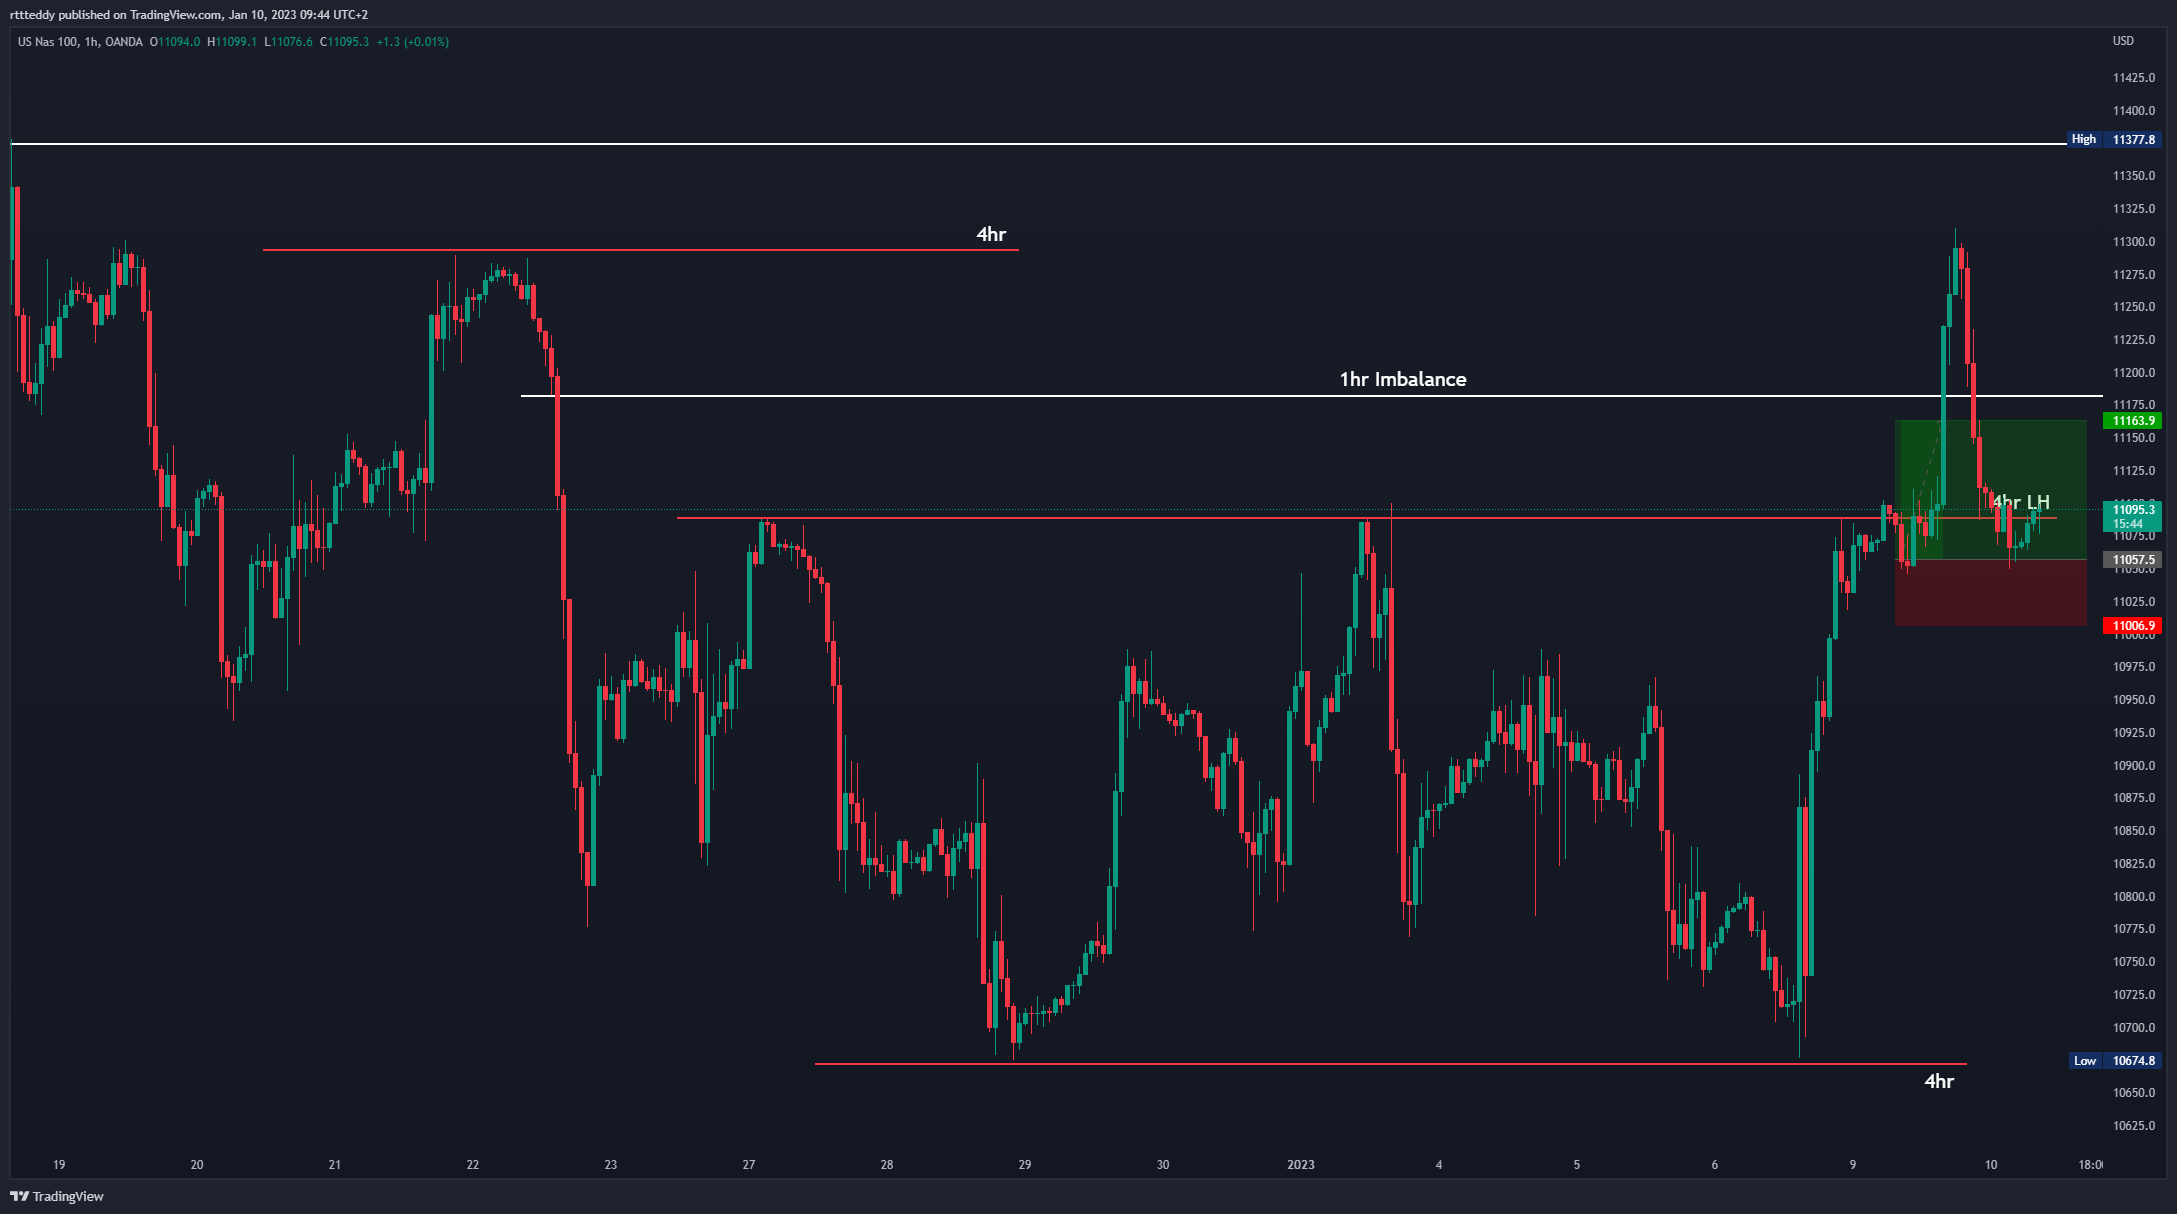

In [26]:
from IPython import display
# 11061.7, 17518000, 11046.1, 11101.5 == 11162.06 Buy
display.Image("USTECH100-09-01-23.png")

In [27]:
filename = 'ustech_model'
pickle.dump(model,open(filename,'wb'))

In [28]:
pickle.dump(model, open('nas100.pkl', 'wb'))